In [1]:
import json
import pathlib
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
# Paths
overclustering_dir = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClustering')
# train_annotation_dir = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClusteringAnnotation\train')
# val_annotation_dir = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClusteringAnnotation\validation')
annotation_dir_gray = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClusteringAnnotation\all_gray')
annotation_dir_color = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClusteringAnnotation\all_color')

In [3]:
# Parameters
class_ind = {'Background':0,
             'Sand':1,
             'Seagrass / turf':2,
             'Rockweed':3,
             'Blue mussels':4,
             'Deep water':5}
training_image_numbers = [13,20,21,24,25,30,31]
validation_image_numbers = [15,19,26,29]

In [4]:
custom_cmap = matplotlib.colors.ListedColormap(colors=['lightgray','khaki','limegreen','sienna','dodgerblue','darkblue'])

In [5]:
image_dirs = list(overclustering_dir.glob('*[0-9]'))

In [6]:
# train_dirs = [folder for folder in image_dirs if (int(folder.stem) in training_image_numbers)]
# val_dirs = [folder for folder in image_dirs if (int(folder.stem) in validation_image_numbers)]

Juvika_June2022_Pika_L_13.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


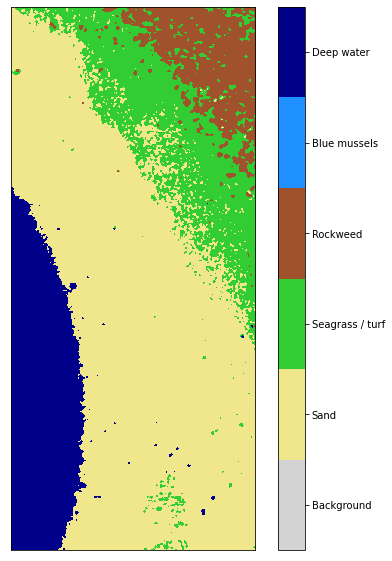

Juvika_June2022_Pika_L_15.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


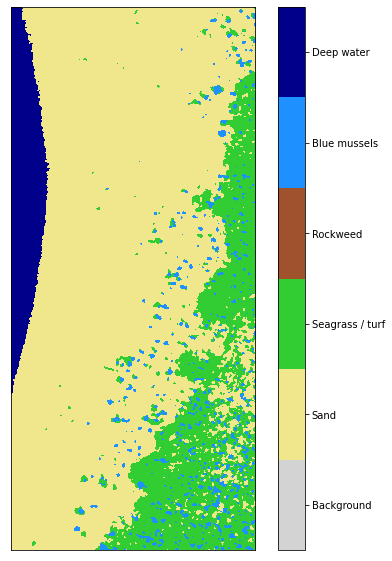

Juvika_June2022_Pika_L_19.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


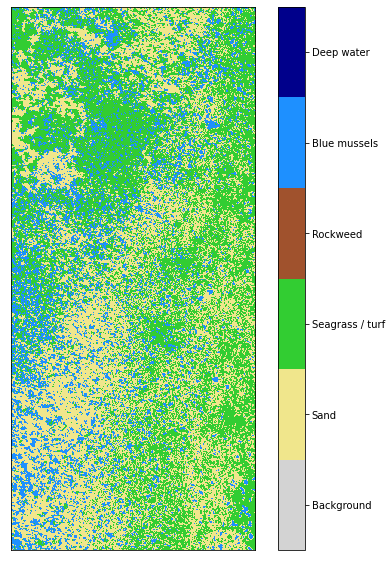

Juvika_June2022_Pika_L_20.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


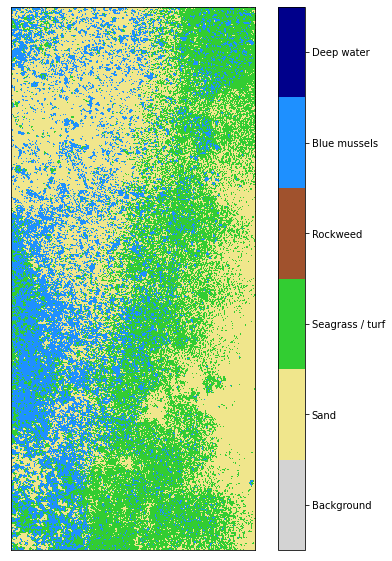

Juvika_June2022_Pika_L_21.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


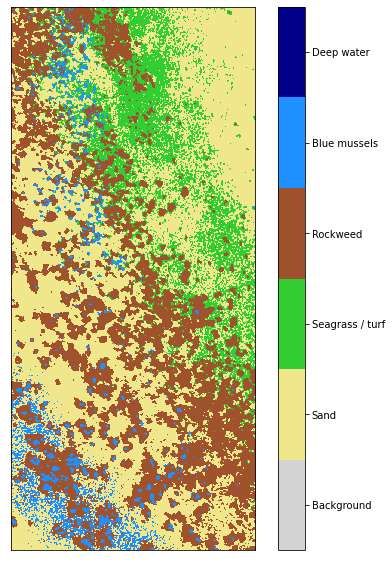

Juvika_June2022_Pika_L_24.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


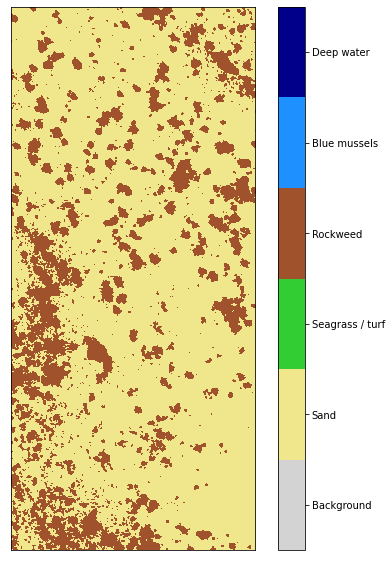

Juvika_June2022_Pika_L_25.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


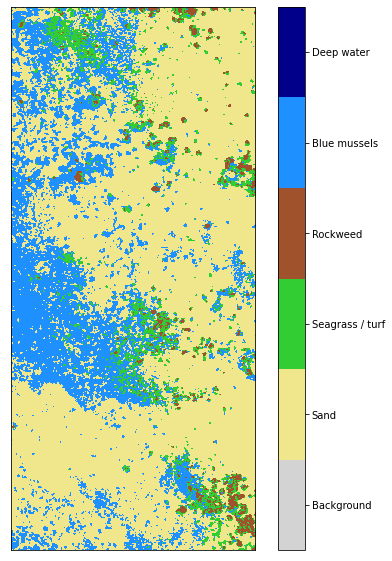

Juvika_June2022_Pika_L_26.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


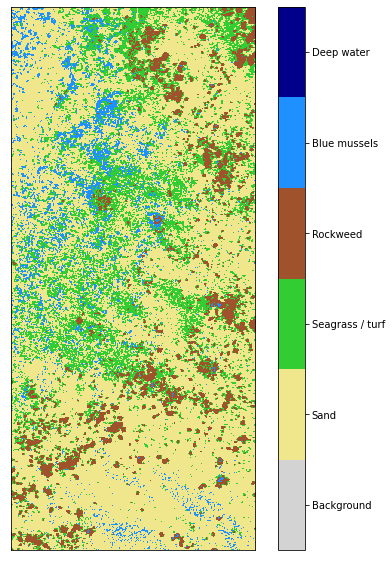

Juvika_June2022_Pika_L_29.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


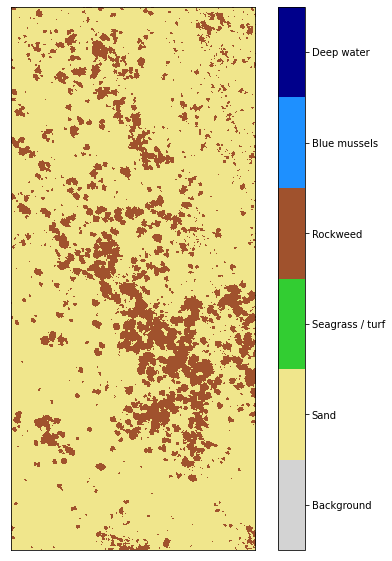

Juvika_June2022_Pika_L_30.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


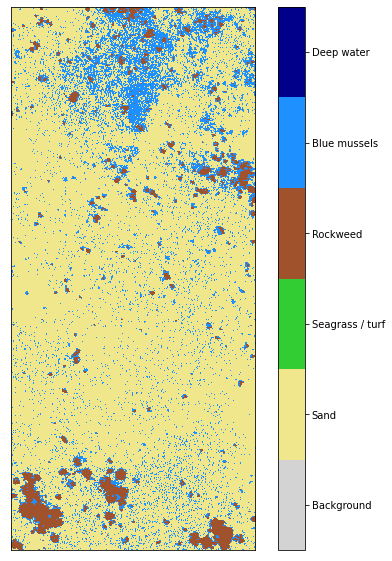

Juvika_June2022_Pika_L_31.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff


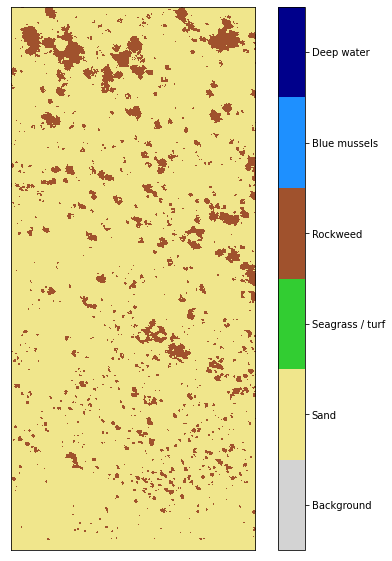

In [8]:
for image_dir in image_dirs:
    # Open cluster label file
    cluster_label_file = list(image_dir.glob('*.txt'))[0]
    with open(cluster_label_file, 'r') as textfile:
        cluster_labels = json.load(textfile)
    
    # Open cluster image annd create "empty" class image
    cluster_image_path = list(image_dir.glob('*_gray.tiff'))[0]
    print(cluster_image_path.name)
    cluster_image = skimage.io.imread(cluster_image_path)[:,:,0]
    cluster_values = np.unique(cluster_image)
    class_image = np.zeros_like(cluster_image)
    
    # Merge clusters and assign current class label
    for cluster_value_index, cluster_value in enumerate(cluster_values):
        for cluster_name, cluster_indices in cluster_labels.items():
            if (cluster_value_index in cluster_indices):   
                class_image[cluster_image==cluster_value] = class_ind[cluster_name]
                
    # Save integer class image
    class_image_path_gray = annotation_dir_gray / cluster_image_path.name
    #skimage.io.imsave(class_image_path_gray,class_image)
    
    # Save color figure
    plt.figure(figsize=(8,10))
    plt.imshow(class_image,cmap=custom_cmap,vmin=0,vmax=6,interpolation='none')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])    
    cb = plt.colorbar()
    cb.set_ticks([0.5,1.5,2.5,3.5,4.5,5.5])
    cb.set_ticklabels(list(class_ind.keys()))
    class_image_path_color = annotation_dir_color / cluster_image_path.name
    plt.savefig(class_image_path_color,dpi=450,bbox_inches='tight')
    plt.show()
    
